In [1]:
from unittest import skipIf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [12]:
preds = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

In [14]:
accuracy_score(preds, y_test)

0.9702970297029703

In [16]:
confusion_matrix = confusion_matrix(preds, y_test)

In [17]:
pd.DataFrame(confusion_matrix, columns=model.classes_, index=model.classes_)

,Adelie,Chinstrap,Gentoo
Adelie,39,1,0
Chinstrap,2,22,0
Gentoo,0,0,37


In [18]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.92      0.94        24
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



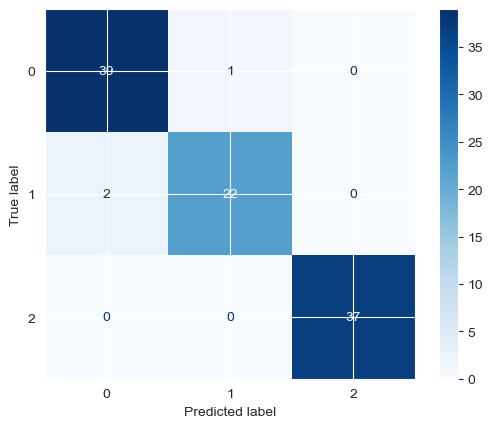

In [19]:
ConfusionMatrixDisplay(confusion_matrix).plot(cmap='Blues')

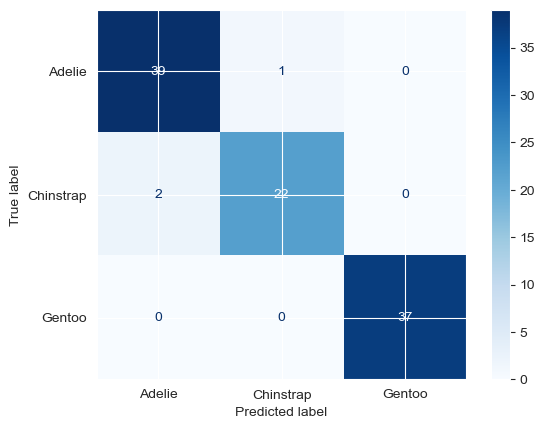

In [23]:
ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_).plot(cmap='Blues');

In [24]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

<Axes: >

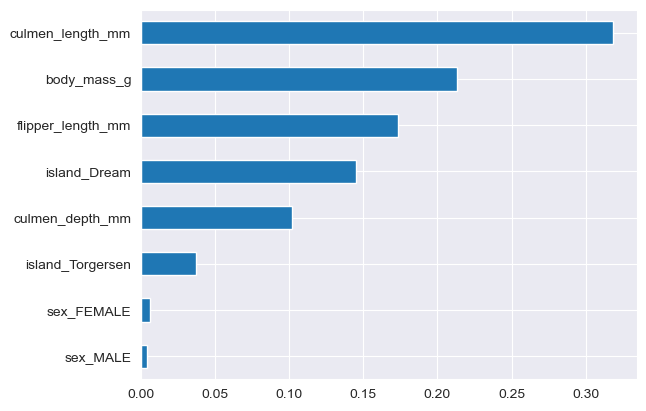

In [25]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')

In [26]:
test_error = []

for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, n_jobs=-1, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1 - accuracy_score(test_preds, y_test))

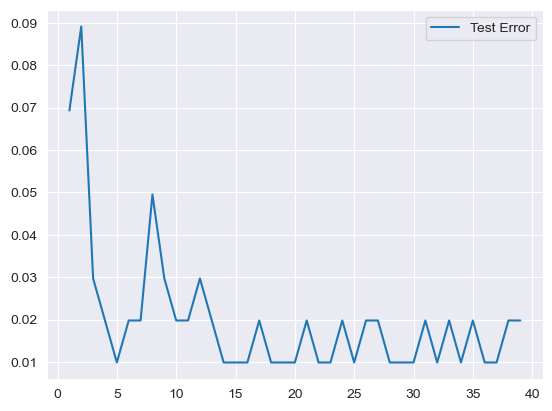

In [30]:
plt.plot(range(1, 40), test_error, label='Test Error')
plt.legend()

In [31]:
df = pd.read_csv("../../DATA/data_banknote_authentication.csv")

In [32]:
df

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


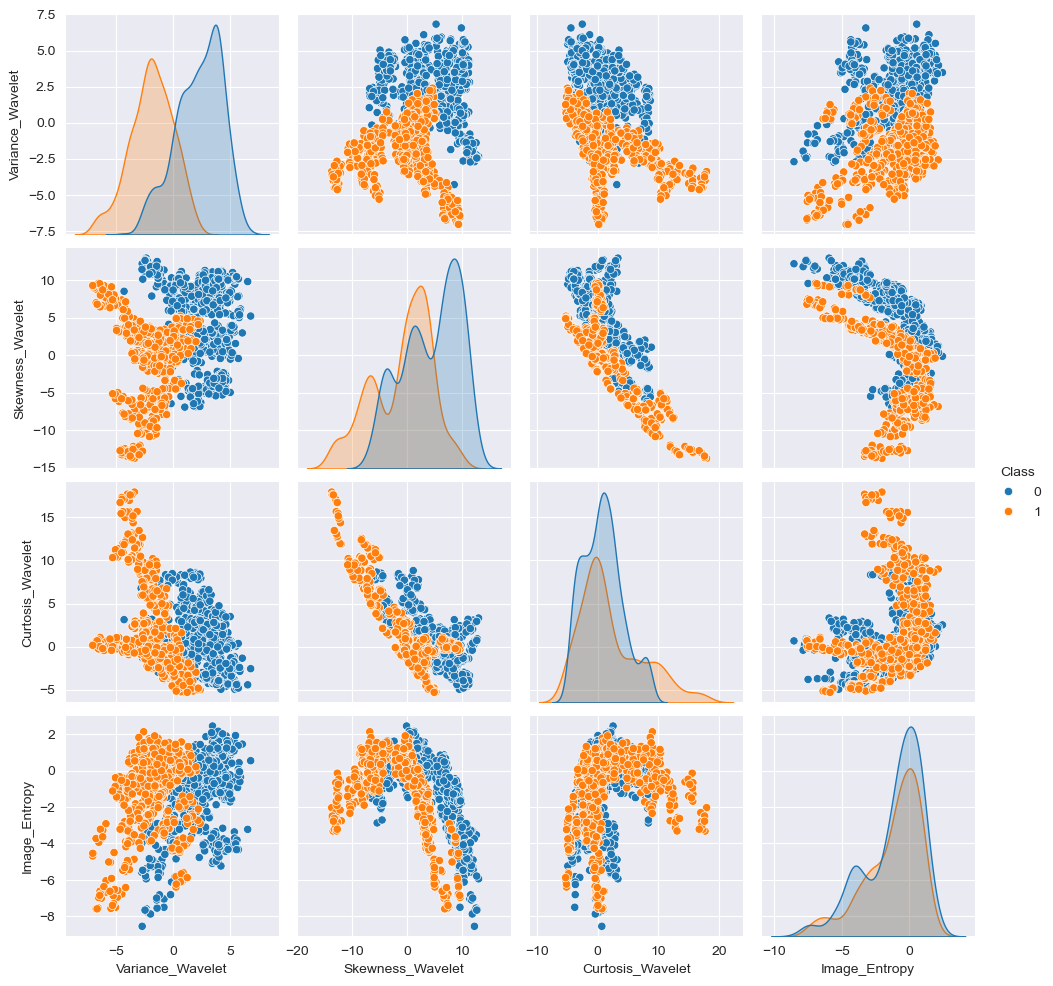

In [33]:
sns.pairplot(df, hue='Class')

In [34]:
X = df.drop("Class",axis=1)

In [35]:
y = df["Class"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [41]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [42]:
rfc = RandomForestClassifier()
grid = GridSearchCV(estimator=rfc, param_grid=param_grid)

In [44]:
grid.fit(X_train, y_train)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\ens

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [45]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [46]:
predictions = grid.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [50]:
grid.best_estimator_.oob_score

False

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

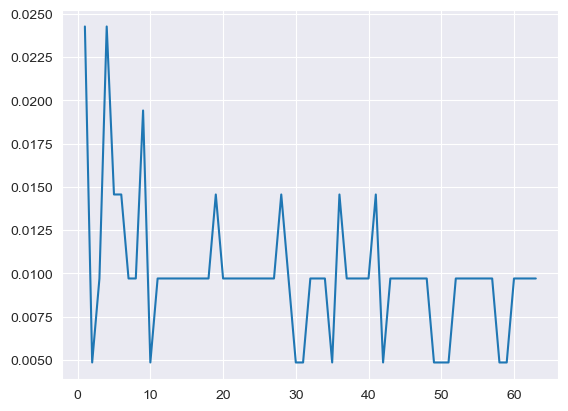

In [54]:
plt.plot(range(1,64),errors)

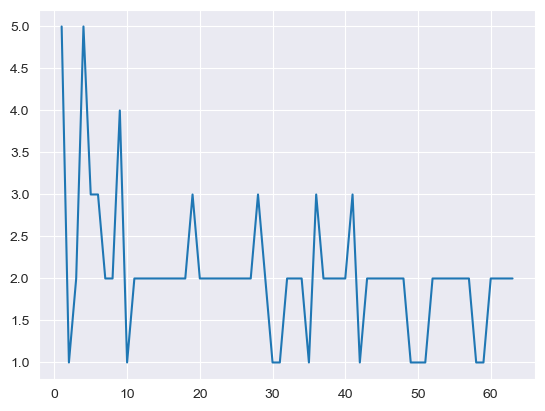

In [55]:
plt.plot(range(1,64),misclassifications)